In [46]:
import pytrends.dailydata as dd
import matplotlib.pyplot as plt
from datetime import datetime

In [132]:
def download_daily_google_trends(keyword, startYear, startMonth, endYear, endMonth):
    
    #API doc  and math explained: https://github.com/GeneralMills/pytrends/blob/master/pytrends/dailydata.py
    df_daily = dd.get_daily_data(keyword, startYear, startMonth, endYear, endMonth)
    df_daily.tail(31)
    
    # plotting the data per month obtained from Google
    plt.plot(df_daily.index, df_daily[f"{keyword}_monthly"])
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.title(f"Google trends (monthly data): {keyword}")
    plt.grid(True)
    plt.show()
    
    #plotting the daily data rescaled from the monthly data and the data in a month month 'APIs'
    plt.plot(df_daily.index, df_daily[f"{keyword}"])
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.title(f"Google trends(rescaled to make the daily data comparable): {keyword}")
    plt.grid(True)
    plt.show()
    
    #download CSV of the dt
    timestamp = int(datetime.timestamp(datetime.now()))
    filename = f"google_trends_{keyword}_{timestamp}.csv"
    df_daily.to_csv(filename)
    return

In [148]:
import os
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

def parse_record(record):
    date = record[11:21]
    value = record[24:-1]
    return np.array([date,value])

def download_graph_data(url, columnName):
    response = requests.get(url)
    script_text = BeautifulSoup(response.text,'lxml').findAll('script')[5].text
    pattern = re.compile(r'\[new Date\("\d{4}/\d{2}/\d{2}"\),\d*\w*\]')
    records = pattern.findall(script_text)
    transactions = np.empty((0,2))
    for record in records:
        transactions = np.vstack((transactions, parse_record(record)))
    #transactions = np.array(transactions)
    df_tweet = pd.DataFrame(transactions[:,1], index=transactions[:,0], columns=[f"{columnName}"])
    df_tweet.index = pd.to_datetime(df_tweet.index)
    print(df_tweet.tail(3))
    
    #plot the tweet count
    plt.plot(df_tweet.index, df_tweet[f"{columnName}"])
    plt.yscale('log')
    plt.title(f"{columnName}")
    plt.grid(True)
    
    #download CSV of the dt
    timestamp = int(datetime.timestamp(datetime.now()))
    filename = f"{columnName}_{timestamp}.csv"
    #df_tweet.to_csv(filename)

           ethereum_tweet_count
2019-10-31                 4026
2019-11-01                 3420
2019-11-02                 3428


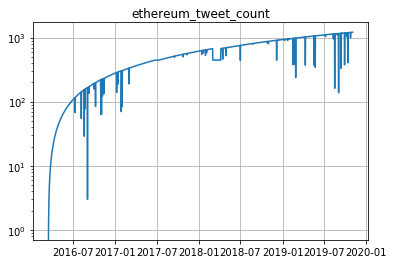

In [149]:
#download_daily_google_trends(keyword = 'ethereum', startYear=2015, startMonth=7, endYear=2019, endMonth=11)
download_graph_data(url='https://bitinfocharts.com/comparison/ethereum-tweets.html', columnName='ethereum_tweet_count')